In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 5))
mpl.rc('image', cmap='gray')
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
#frames = pims.open('transfer_56498_files_add89c83/brownianmotion_2022-08-30-140704-0001.avi')

@pims.pipeline
def gray(image):
    return image[:, :, 1]  # Take just the green channel

frames = gray(pims.open('stack2/*.png'))
#from pims import ImageSequence
#images = ImageSequence('stack/*.tif')
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: /Users/dagkd/UiO Dropbox/Dag Dysthe/Education/BiologicalPhysics/2024/work/Ch3-5_motion/src/stack2/*.png
    Length: 67 frames
    Frame Shape: (2704, 3376, 3)
    Pixel Datatype: uint8

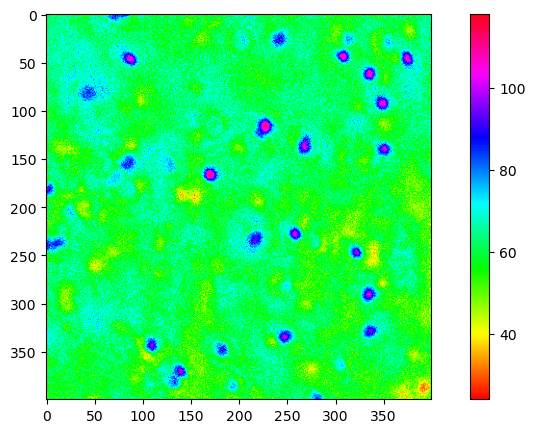

In [2]:
im0=frames[0]
im1=im0[250:650,250:650]
plt.imshow(255-im1,cmap="hsv");
plt.colorbar()
plt.show()

In [3]:
f = tp.locate(im1, 11, invert=True)

Make sure to check your images to find a good diameter of the particles (set to 11 here).

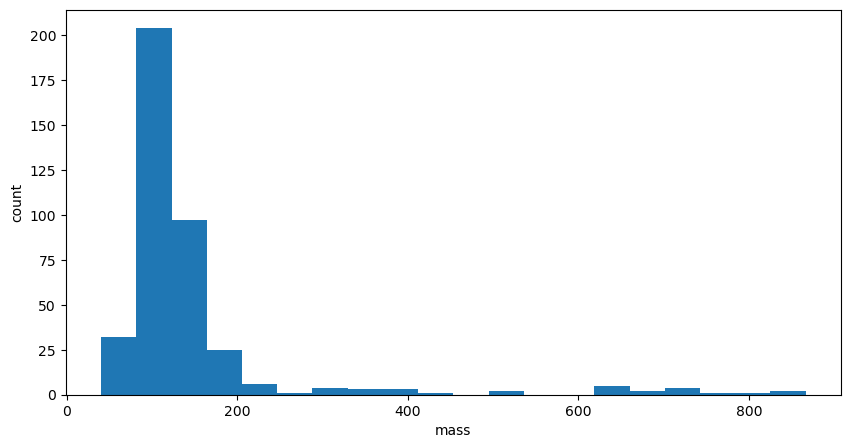

In [4]:
f.shape
f.head()
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)

# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count');

The histogram shows that there are lots of "particles" identified that have a mass smaller than 200. The "mass" is "mass means total integrated brightness of the blob", but the definition is a bit ambiguous. Spend some time on finding a reasonable "mass"!

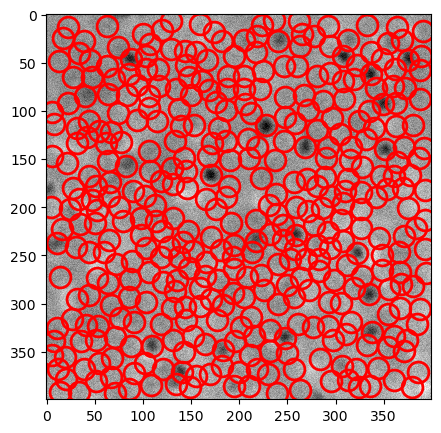

In [5]:
tp.annotate(f, im1);

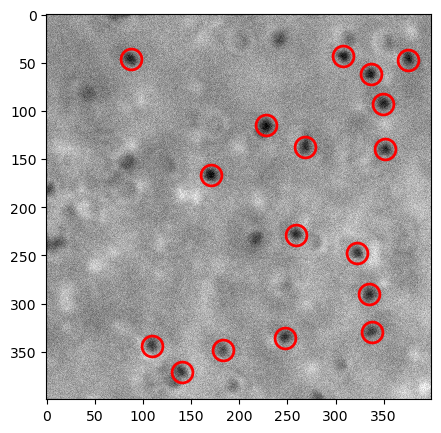

In [6]:
f = tp.locate(im1, 11, invert=True, minmass=500)
tp.annotate(f, im1);